# 1. 匯入函式庫 Importing Libraries

Before we create our own carbon footprint AI model, we have to import all necessary libraries.

在我們建立自己的碳足跡AI模型之前，必須先導入所有必要的函式庫。

Imagine you want to bake a cake, before you start baking, you'll need tools like a mixing bowl, a whisk, and measuring cups.

就像你要烤蛋糕前，需要先準備好工具，例如攪拌碗、打蛋器和量杯一樣。

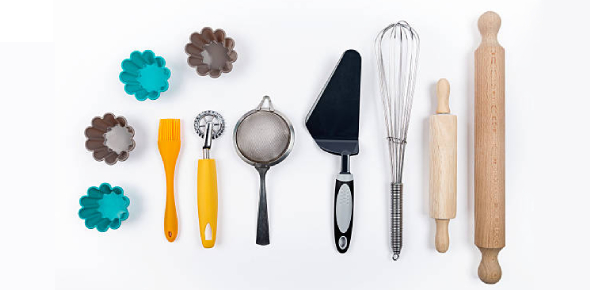

Similarly, before we build our carbon footprint AI model, we need to `import` special code tools called libraries—like `pandas` for data mixing, `scikit-learn` for the AI "recipe" (random forest) and `matplotlib` to generate colourful charts! 🌈

同樣地，在建立碳足跡AI模型前，我們需要導入一種叫「程式庫」的特殊工具, 例如`pandas`用來處理數據，`scikit-learn`用來建造AI模型 (隨機森林），`matplotlib` 用來製作七彩的圖表。🌈

Just like you can't bake without flour, we can't code without our libraries! 🎂✨➡️🤖

就像沒有麵粉就烤不了蛋糕一樣，沒有程式庫我們就寫不了AI！🎂✨➡️🤖


In [1]:
!pip install gdown flask-ngrok pandas scikit-learn matplotlib seaborn pydot numpy

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot
import gdown
import numpy as np

# 2. 導入及理解數據 Importing and Understand Data


In [3]:
folder_url = "https://drive.google.com/drive/folders/1ZyNJzWSQy8myoJexFeXoEOKc8u468XEk?usp=sharing"
gdown.download_folder(folder_url, quiet=True, use_cookies=False)

['/content/static/Carbon Emission 2 (1).csv',
 '/content/static/carbonHero.jpeg',
 '/content/static/carbonMonster.jpeg']

First of all, we need to import our data. This is just like putting some flour into our mixing bowl.

首先， 我們需要導入數據。這就好像將麵粉放入大碗裡。

In [4]:
data = pd.read_csv("/content/static/Carbon Emission 2 (1).csv")

After importing the data, we can take a look at the data. Let's take a look at the first three rows of the database.

匯入資料後，我們可以先檢視數據內容。現在來看看資料庫的前三行內容吧。

In [5]:
data.head(3)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595


Let's take a look at what data did the researchers collect from our study participants.

讓我們看看研究人員從參與者身上收集了哪些數據吧！

In [6]:
list(data.columns)

['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Vehicle Type',
 'Social Activity',
 'Monthly Grocery Bill',
 'Frequency of Traveling by Air',
 'Vehicle Monthly Distance Km',
 'Waste Bag Size',
 'Waste Bag Weekly Count',
 'How Long TV PC Daily Hour',
 'How Many New Clothes Monthly',
 'How Long Internet Daily Hour',
 'Energy efficiency',
 'Recycling',
 'Cooking_With',
 'CarbonEmission']

Let's continue to understand the data a little bit more...

讓我們繼續深入了解這些數據...

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [8]:
data.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [9]:
data["Body Type"].value_counts()

,count
Body Type,
underweight,2540
obese,2500
overweight,2487
normal,2473


In [10]:
data["Sex"].value_counts()

,count
Sex,
female,5007
male,4993


In [11]:
data['Diet'].value_counts()

,count
Diet,
pescatarian,2554
vegan,2497
omnivore,2492
vegetarian,2457


# 3. 數據處理 Data Preprocessing




In [12]:
num_columns = data.select_dtypes(include=['number']).columns.tolist()

In [13]:
def numerical_to_four_percentile_categories(df, numerical_columns=None):
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

    for col in numerical_columns:
        if col in df.columns:
            p25 = df[col].quantile(0.25)
            p50 = df[col].quantile(0.50)
            p75 = df[col].quantile(0.75)
            bins = [-float('inf'), p25, p50, p75, float('inf')]
            labels = [0, 1, 2, 3]
            df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    return df


def transform_target(df, numerical_columns=None):
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

    for col in numerical_columns:
        if col in df.columns:
            p50 = df[col].quantile(0.5)
            bins = [-float('inf'), p50 ,float('inf')]
            # Low for 0 and 1 for High
            labels = [0, 1]
            df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    return df

In [14]:
data_new = numerical_to_four_percentile_categories(data, num_columns[:-1])
data_new = transform_target(data_new, ["CarbonEmission"])

In [15]:
data_new = data_new.drop(columns=['Vehicle Type', 'Recycling', 'Cooking_With', 'Energy efficiency'])
data_new['Body Type'] = data_new['Body Type'].map({'underweight':0, 'normal': 1, 'overweight': 2, 'obese': 3})
data_new['Sex'] = data_new['Sex'].map({'female':0, 'male': 1})
data_new['Diet'] = data_new['Diet'].map({'vegan':0, 'vegetarian':1, 'pescatarian': 2, 'omnivore': 3})
data_new['How Often Shower'] = data_new['How Often Shower'].map({'less frequently': 0, 'daily': 1, 'twice a day': 2, 'more frequently':3})
data_new['Heating Energy Source'] = data_new['Heating Energy Source'].map({'electricity': 0, 'wood': 1, 'natural gas': 2, 'coal':3 })
data_new['Transport'] = data_new['Transport'].map({'walk/bicycle': 0, 'public': 1, 'private':2})
data_new['Social Activity'] = data_new['Social Activity'].map({'never': 0, 'sometimes':1, 'often':2})
data_new['Frequency of Traveling by Air'] = data_new['Frequency of Traveling by Air'].map({'never': 0, 'rarely':1, 'frequently': 2, 'very frequently': 3})
data_new['Waste Bag Size'] = data_new['Waste Bag Size'].map({'small': 0, 'medium': 1, 'large': 2, 'extra large':3})

In [16]:
data_new.head(3)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
0,2,0,2,1,3,1,2,2,2,1,2,1,1,2,0,1
1,3,0,1,0,2,0,2,1,1,0,3,1,1,2,0,0
2,2,1,3,3,1,2,0,1,0,2,0,0,2,3,0,1


# 4. 訓練AI模型 （隨機森林）Training the Model (Random Forest)

In [17]:
X = data_new.iloc[:, :-1].values
y = data_new.iloc[:, -1].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [20]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 85.95%


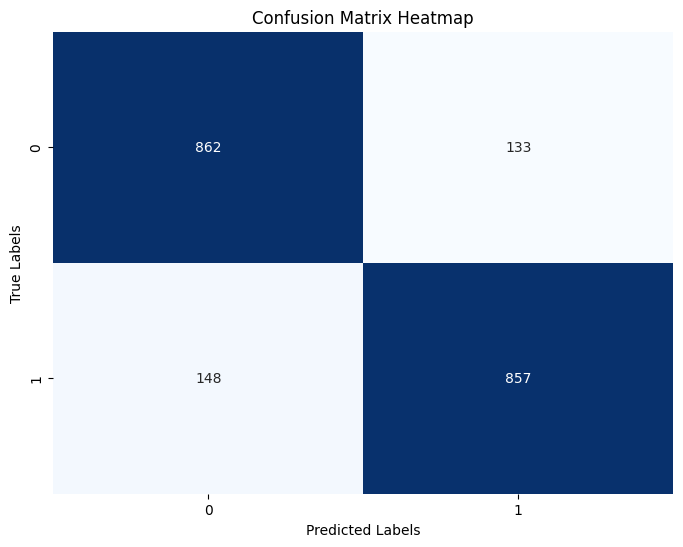

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

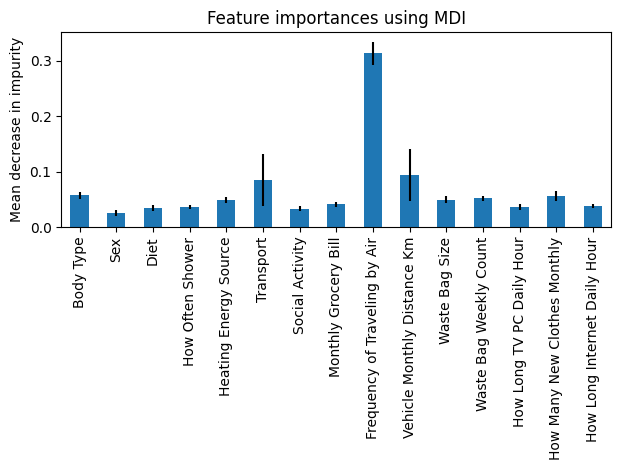

In [22]:
# Obtain the importance of the features of the model
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

forest_importances = pd.Series(importances, index=data_new.columns[:-1])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [23]:
# Get the first tree (you can choose any index)
individual_tree = classifier.estimators_[0]

# Export the decision tree as a DOT file
export_graphviz(individual_tree, out_file='/content/individual_tree.dot',
                feature_names=data_new.columns[:-1],
                class_names=["Passes", "Failed"],
                rounded=True, filled=True)

# Convert the DOT file to a PNG image using Graphviz
(graph,) = pydot.graph_from_dot_file('/content/individual_tree.dot')
graph.set_dpi(600)

# Write the PNG image
graph.write_png('/content/individual_tree.png')

# 5. 嘗試AI模型 Run Predictions

In [24]:
len(list(data_new.columns))

16

In [25]:
list(data_new.columns)

['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Social Activity',
 'Monthly Grocery Bill',
 'Frequency of Traveling by Air',
 'Vehicle Monthly Distance Km',
 'Waste Bag Size',
 'Waste Bag Weekly Count',
 'How Long TV PC Daily Hour',
 'How Many New Clothes Monthly',
 'How Long Internet Daily Hour',
 'CarbonEmission']

1 Single Test Example

*   Body Type - normal [1]
*   Sex - Male [1]
*   Diet - [0]
*   How Often Shower - [2]
*   Heating Energy Source - [0]
*   Transport - [1]
*   Social Activity - [2]
*   Monthly Grocery Bill - [2]
*   Frequency of Traveling by Air - [1]
* Vehicle Monthly Distance Km - [1]
*  Waste Bag Size - [0]
*  Waste Bag Weekly Count - [2]
*  How Long TV PC Daily Hour - [2]
*  How many New Clothes Monthly - [1]
* How Long Internet Daily Hour - [1]




In [26]:
single_test_eg = np.array([[1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1]])

In [27]:
classifier.predict(single_test_eg)

array([0])

In [28]:
classifier.predict(np.array([[3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 1 ]]))

array([1])

In [29]:
classifier.predict(np.array([[3,1,3,3,3,2,2,3,3,3,3,3,3,3,3]]))

array([1])

In [30]:
print(np.array([[3,1,3,3,3,2,2,3,3,3,3,3,3,3,3]]))

[[3 1 3 3 3 2 2 3 3 3 3 3 3 3 3]]


# 6. 網頁版 Run Web Application

In [31]:
!pip install flask-ngrok

In [33]:

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Carbon Footprint Category Predictor/ 碳足迹分類器</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 900px;  /* Wider to fit bilingual text */
            margin: 0 auto;
            padding: 20px;
            line-height: 1.6;
        }
        h1 {
            color: #2c3e50;
            text-align: center;
            margin-bottom: 5px;
        }
        .subtitle {
            text-align: center;
            color: #7f8c8d;
            margin-bottom: 20px;
        }
        .form-group {
            margin-bottom: 15px;
            padding: 15px;
            background-color: #f9f9f9;
            border-radius: 5px;
            display: flex;
            align-items: center;
        }
        label {
            display: inline-block;
            width: 300px;  /* Wider for bilingual text */
            font-weight: bold;
            margin-right: 10px;
        }
        label span.chinese {
            font-weight: normal;
            color: #666;
            display: block;
            font-size: 0.9em;
        }
        select {
            padding: 8px;
            width: 250px;
            border-radius: 4px;
            border: 1px solid #ddd;
        }
        button {
            display: block;
            margin: 20px auto;
            padding: 10px 20px;
            background-color: #4CAF50;
            color: white;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-size: 16px;
        }
        button:hover {
            background-color: #45a049;
        }
        #result {
            margin-top: 20px;
            padding: 15px;
            background-color: #e8f4f8;
            border-radius: 5px;
            display: none;
        }
        .bilingual {
            display: flex;
            justify-content: space-between;
        }
        .bilingual p {
            width: 48%;
        }
    </style>
</head>
<body>
    <h1>Carbon Footprint Category Predictor</h1>
    <div class="subtitle">碳足迹分類器</div>

    <form id="carbonForm" action="/predict" method="post">
        <!-- Each label now has English + Chinese -->
        <div class="form-group">
            <label for="bodyType">
                Body Type 身形
            </label>
            <select id="bodyType" name="bodyType">
                <option value="0">underweight / 偏瘦</option>
                <option value="1">normal / 正常</option>
                <option value="2">overweight / 超重</option>
                <option value="3">obese / 肥胖</option>
            </select>
        </div>

        <div class="form-group">
            <label for="sex">
                Sex 性別
            </label>
            <select id="sex" name="sex">
                <option value="0">female / 女性</option>
                <option value="1">male / 男性</option>
            </select>
        </div>

        <div class="form-group">
            <label for="diet">
                Diet 飲食習慣
            </label>
            <select id="diet" name="diet">
                <option value="0">vegan / 純素</option>
                <option value="1">vegetarian / 素食</option>
                <option value="2">pescatarian / 魚素</option>
                <option value="3">omnivore / 雜食</option>
            </select>
        </div>

        <div class="form-group">
            <label for="showerFrequency">
                How Often Shower 洗澡次數
            </label>
            <select id="showerFrequency" name="showerFrequency">
                <option value="0">less frequently / 較少</option>
                <option value="1">daily / 每天</option>
                <option value="2">twice a day / 每天兩次</option>
                <option value="3">more frequently / 更頻繁</option>
            </select>
        </div>

        <div class="form-group">
            <label for="heatingSource">
                Heating Energy Source 供暖能源來源
            </label>
            <select id="heatingSource" name="heatingSource">
                <option value="0">electricity / 電力</option>
                <option value="1">wood / 木材</option>
                <option value="2">natural gas / 天然气</option>
                <option value="3">coal / 煤</option>
            </select>
        </div>

        <div class="form-group">
            <label for="transport">
                Transport 交通
            </label>
            <select id="transport" name="transport">
                <option value="0">walk/bicycle / 步行/自行车</option>
                <option value="1">public / 公共交通</option>
                <option value="2">private / 私人交通</option>
            </select>
        </div>

        <div class="form-group">
            <label for="socialActivity">
                Social Activity 社交活動
            </label>
            <select id="socialActivity" name="socialActivity">
                <option value="0">never / 從不</option>
                <option value="1">sometimes / 有時</option>
                <option value="2">often / 經常</option>
            </select>
        </div>
        <div class="form-group">
            <label for="monthlyGroceryBill">
                Monthly Grocery Bill  每月開支
            </label>
            <select id="monthlyGroceryBill" name="monthlyGroceryBill">
                <option value="0">Low 低</option>
                <option value="1">Medium 中</option>
                <option value="2">High 高</option>
                <option value="3">Very High 極高</option>
            </select>
        </div>
        <div class="form-group">
            <label for="airTravel">
                Frequency of Traveling by Air 乘搭飛機次數
            </label>
            <select id="airTravel" name="airTravel">
                <option value="0">never / 從不</option>
                <option value="1">rarely / 很少</option>
                <option value="2">frequently / 經常</option>
                <option value="3">very frequently / 非常頻繁</option>
            </select>
        </div>

        <div class="form-group">
            <label for="vehicleMonthlyDistance">
                Monthly Travel Distance 每月出行距離
            </label>
            <select id="vehicleMonthlyDistance" name="wasteBagSize">
                <option value="0">Low / 低</option>
                <option value="1">Moderate / 中</option>
                <option value="2">High / 高</option>
                <option value="3">Very High / 超高</option>
            </select>
        </div>

        <div class="form-group">
            <label for="wasteBagSize">
                Waste Bag Size 垃圾袋尺寸
            </label>
            <select id="wasteBagSize" name="wasteBagSize">
                <option value="0">small / 小</option>
                <option value="1">medium / 中</option>
                <option value="2">large / 大</option>
                <option value="3">extra large / 特大</option>
            </select>
        </div>

        <div class="form-group">
            <label for="wasteBagWeeklyCount">
                Waste Bag Weekly Count 每週垃圾袋數目
            </label>
            <select id="wasteBagWeeklyCount" name="wasteBagSize">
                <option value="0">Low / 少量</option>
                <option value="1">Medium / 適量</option>
                <option value="2">High / 大量</option>
                <option value="3">Very High/ 超大量</option>
            </select>
        </div>

        <div class="form-group">
            <label for="screenTime">
                ScreenTime 螢幕時間
            </label>
            <select id="screenTime" name="screenTime">
                <option value="0">Less than 1 hour (Low) / 少於1小時 (低)</option>
                <option value="1">1-3 hours (Moderate) / 1-3小時 (中)</option>
                <option value="2">3-6 hours (High) / 3-6小時 (高)</option>
                <option value="3">6+ hours (Very High) / 6+小時 (極高)</option>
            </select>
        </div>

        <div class="form-group">
            <label for="newClothes">
                New Clothes 買新的衣服
            </label>
            <select id="newClothes" name="newClothes">
                <option value="0">0-1 items (Minimalist) / 0-1件 (極簡)</option>
                <option value="1">2-4 items (Low) / 2-4件 (少量)</option>
                <option value="2">5-8 items (Average) / 5-8件 (一般)</option>
                <option value="3">9+ items (High) / 9+件 (大量)</option>
            </select>
        </div>

        <div class="form-group">
            <label for="internetUse">
                InternetUse 互聯網使用時間
            </label>
            <select id="internetUse" name="internetUse">
                <option value="0">0-2 hours (Light) / 0-2小時 (輕度)</option>
                <option value="1">2-4 hours (Moderate) / 2-4小時 (中度)</option>
                <option value="2">4-8 hours (Heavy) / 4-8小時 (重度)</option>
                <option value="3">8+ hours (Excessive) / 8+小時 (過度)</option>
            </select>
        </div>


        <button type="button" onclick="predictCarbonFootprint()">
            Calculate Carbon Footprint / 計算碳足跡
        </button>
    </form>

    <div id="result">
        <h2>Result / 結果</h2>
        <img id='Low' src='/static/carbonHero.jpeg' style='display:none;width:80%;'/>
        <img id='High' src='/static/carbonMonster.jpeg' style='display:none;width:80%;'/>
        <div class="bilingual">
            <p id="resultTextEn"></p>
            <p id="resultTextZh"></p>
        </div>
    </div>

    <script>
        function predictCarbonFootprint() {
          document.getElementById('result').style.display = 'none';

    // Get all form values
    const formData = {
        bodyType: parseInt(document.getElementById('bodyType').value),
        sex: parseInt(document.getElementById('sex').value),
        diet: parseInt(document.getElementById('diet').value),
        showerFrequency: parseInt(document.getElementById('showerFrequency').value),
        heatingSource: parseInt(document.getElementById('heatingSource').value),
        transport: parseInt(document.getElementById('transport').value),
        socialActivity: parseInt(document.getElementById('socialActivity').value),
        airTravel: parseInt(document.getElementById('airTravel').value),
        wasteBagSize: parseInt(document.getElementById('wasteBagSize').value),
        monthlyGroceryBill: parseInt(document.getElementById('monthlyGroceryBill').value), // Fixed typo: getElemengById → getElementById
        vehicleMonthlyDistance: parseInt(document.getElementById('vehicleMonthlyDistance').value),
        wasteBagWeeklyCount: parseInt(document.getElementById('wasteBagWeeklyCount').value),
        screenTime: parseInt(document.getElementById('screenTime').value),
        newClothes: parseInt(document.getElementById('newClothes').value), // Fixed missing closing quote (')
        internetUse: parseInt(document.getElementById('internetUse').value)
    };

    // Send data to server for prediction
    fetch('/predict', {
        method: 'POST',
        headers: {
            'Content-Type': 'application/json',
        },
        body: JSON.stringify(formData)
    })
    .then(response => response.json())
    .then(data => {
        console.log(data);
        // Display the result
        document.getElementById('resultTextEn').innerHTML =
            `<strong>Your carbon footprint category is:</strong> ${data.category}`;
        document.getElementById('resultTextZh').innerHTML =
            `<strong>您的碳足跡類別是:</strong> ${data.category}`;
        document.getElementById(data.category).style.display = 'block';
        document.getElementById('result').style.display = 'block';
    })
    .catch(error => {
        console.error('Error:', error);
        document.getElementById('resultTextEn').innerHTML =
            'Error calculating carbon footprint. Please try again.';
        document.getElementById('resultTextZh').innerHTML =
            '計算碳足跡時出錯。請再試一次。';
        document.getElementById('result').style.display = 'block';
    });
}
    </script>
</body>
</html>
"""

In [36]:
from flask import Flask, render_template_string, request, jsonify, send_from_directory
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from google.colab.output import eval_js
from flask import Flask, render_template_string
from flask_ngrok import run_with_ngrok
from google.colab import output
import threading
import os
from pyngrok import ngrok


# Sample model training (you should replace with your actual model)
def get_model():
    # This is just a dummy model for demonstration
    # In a real app, you would train this with your actual data
    return classifier

model = get_model()

# Your HTML content (copied from your file)
app = Flask(__name__)
# run_with_ngrok(app)  # This will provide a public URL
@app.route('/')
def home():
    return render_template_string(html_content)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    form_data = {
        'bodyType': int(data['bodyType']),
        'sex': int(data['sex']),
        'diet': int(data['diet']),
        'showerFrequency': int(data['showerFrequency']),
        'heatingSource': int(data['heatingSource']),
        'transport': int(data['transport']),
        'socialActivity': int(data['socialActivity']),
        'monthlyGroceryBill': int(data['monthlyGroceryBill']),
        'airTravel': int(data['airTravel']),
        'vehicleMonthlyDistance':int(data['vehicleMonthlyDistance']),
        'wasteBagSize': int(data['wasteBagSize']),
        'wasteBagWeeklyCount': int(data['wasteBagWeeklyCount']),
        'screenTime': int(data['screenTime']),
        'newClothes': int(data['newClothes']),
        'internetUse': int(data['internetUse'])
    }

    input_data = np.array([list(form_data.values())])
    prediction = model.predict(input_data)[0]
    print(f"Prediction: {prediction}")
    categories = ["Low", "High"]
    category = categories[prediction]
    return jsonify({'category': category})


@app.route('/content/static/<path:filename>')
def serve_static(filename):
    return send_from_directory(os.path.join(app.root_path, 'static'), filename)


def run_flask():
    app.run(host='0.0.0.0', port=5000, debug=True, use_reloader=False)
    # app.run()

In [37]:
thread = threading.Thread(target=run_flask)
thread.daemon = True
thread.start()
from google.colab import output
output.serve_kernel_port_as_window(5000)
print("Open: https://localhost:5000")

Try `serve_kernel_port_as_iframe` instead. 
 * Serving Flask app '__main__'


<IPython.core.display.Javascript object>

Open: https://localhost:5000
 * Debug mode: on
